# K-Means Clustering Analysis for Termite Data

In this Jupyter Notebook, we will explore the application of k-means clustering, a popular unsupervised learning technique, to analyze termite data. We aim to discover underlying patterns or groupings in the dataset without using labeled outcomes.

## Load and Preprocess Data

We start by loading the dataset and conducting necessary preprocessing steps such as handling missing values, encoding categorical features, and normalizing the data to ensure it's suitable for clustering.


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../../global_termite_microbe_wd.csv')  # Adjust the path as needed

data['deployment_date'] = pd.to_datetime(data['deployment_date'])
data['harvest_date'] = pd.to_datetime(data['harvest_date'], format='%Y-%m-%dT%H:%M:%SZ')
data['deployment_duration'] = (data['harvest_date'] - data['deployment_date']).dt.days

# Drop rows with missing values
data_cleaned = data.dropna()

# Select numerical columns for clustering
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(numerical_cols)

## Explaining K-Means Clustering

K-means clustering aims to partition the observations into `k` clusters in which each observation belongs to the cluster with the nearest mean. This method is effective in identifying distinct groups within the data and is commonly used in market segmentation, document clustering, and image segmentation.

### How K-Means Works:
1. **Initialization**: Start by randomly selecting `k` centroids.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recalculate the centroids as the mean of the assigned points.
4. **Iterate**: Repeat the assignment and update steps until convergence or until a set number of iterations is reached.


In [3]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

# Adding cluster labels to the original data
data_cleaned['Cluster'] = clusters


C:\Users\isabe\AppData\Local\Temp\ipykernel_15052\107029323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = clusters


## Visualizing Clusters

Visualizing the clusters can help us understand the grouping and characteristics of the data. We use PCA to reduce dimensionality for easy visualization.

### PCA (Principal Component Analysis):
PCA reduces the dimensionality of the data by transforming it into a new set of variables, which are linear combinations of the original variables and capture the maximum variance in the data.


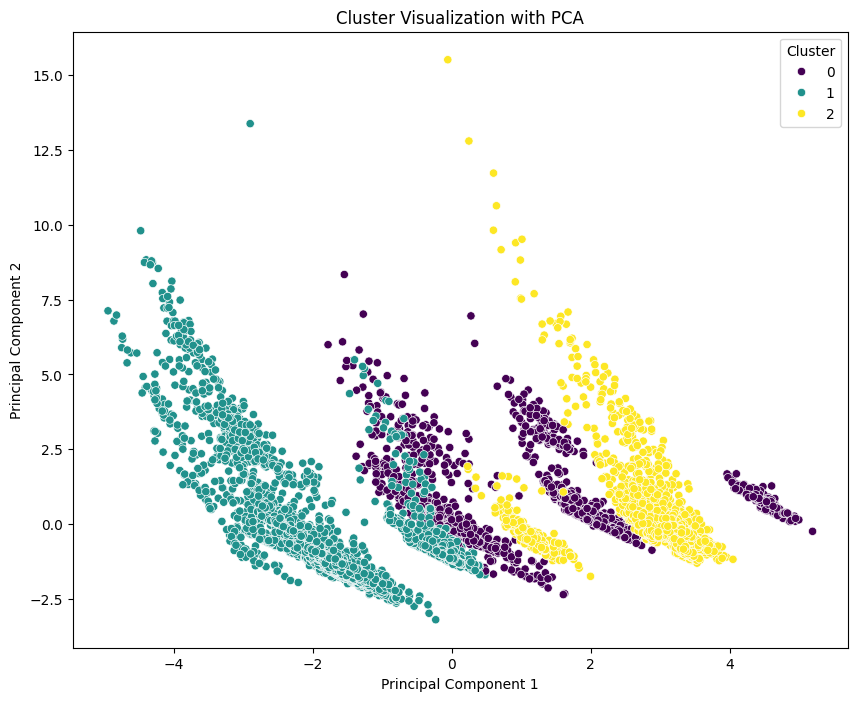

In [4]:
# Reduce dimensions with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data_cleaned['Cluster'], palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Exploring Different K Values in K-Means Clustering

Choosing the right number of clusters (`k`) in k-means clustering is crucial as it significantly affects the clustering outcomes. To demonstrate this, we will apply k-means clustering with different values of `k` to our termite dataset and visualize the results. This exercise will help us understand how varying `k` impacts the cluster formation and may guide us in selecting an appropriate number of clusters for this specific analysis.

### Why Vary K?
- **Interpretability**: Different `k` values can lead to clusters that are more interpretable and meaningful depending on the context.
- **Elbow Method**: By observing how the variance within the clusters decreases as `k` increases, we can apply the Elbow method to choose an optimal `k`.
- **Practical Insight**: Different cluster configurations might reveal hidden patterns in the data that are not apparent with a single `k` value.


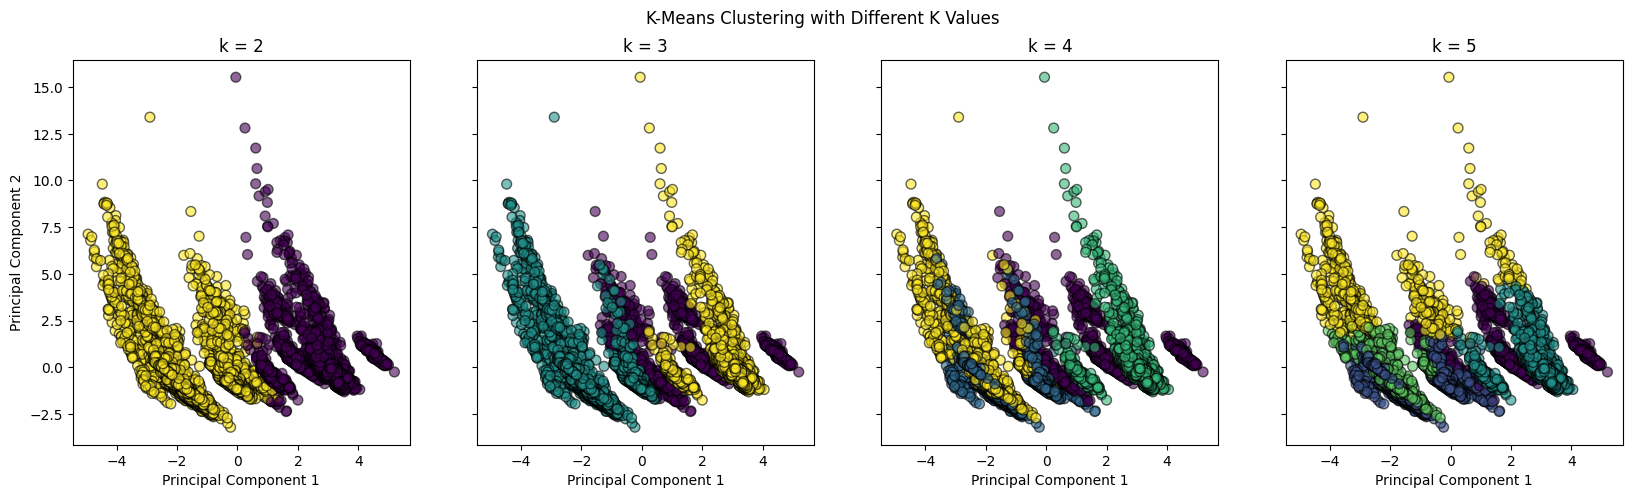

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def k_means_clustering_and_visualization(data, k_values):
    # Standardizing the data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)
    
    # Setting up the figure for plotting
    fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5), sharey=True)
    fig.suptitle('K-Means Clustering with Different K Values')
    
    for i, k in enumerate(k_values):
        # Apply k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_normalized)
        
        # Reduce dimensions with PCA for visualization
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(data_normalized)
        
        # Plotting the clusters
        axes[i].scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
        axes[i].set_title(f'k = {k}')
        axes[i].set_xlabel('Principal Component 1')
        if i == 0:
            axes[i].set_ylabel('Principal Component 2')
    
    plt.show()

# Example usage with different k values
k_values = [2, 3, 4, 5]  # Different k values to try
k_means_clustering_and_visualization(numerical_cols, k_values)


## Conclusion

This notebook demonstrates how k-means clustering can be used to find patterns and groups in termite data. As observed in the visualizations, different `k` values yield distinct clustering outcomes. Understanding these differences is essential for interpreting the results of k-means clustering in practical applications. This approach helps in assessing the robustness of the clustering process and in deciding the most suitable number of clusters to use for further analysis. The clusters identified can provide insights into the characteristics of different groups within the dataset, which can be useful for further analysis and decision-making processes. 
